Número de clústeres: 5
Número de puntos de ruido: 32


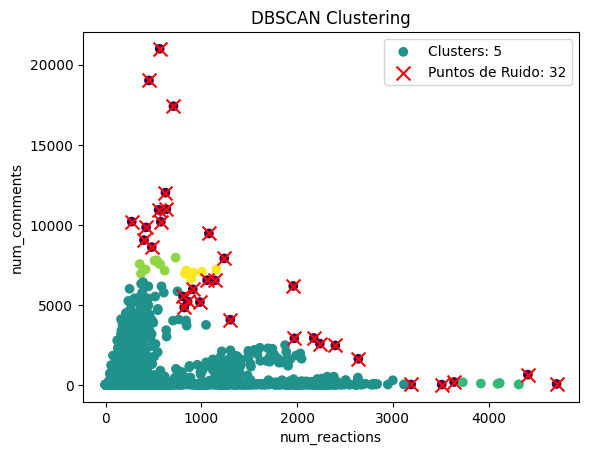

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree
from sklearn.preprocessing import StandardScaler

def dbscan_clustering(archivo_csv, columnas, epsilon, min_samples):
    def dbscan(datos, epsilon, min_pts):
        etiquetas = np.full(len(datos), -1, dtype=int) 
        cluster_id = 0

        tree = cKDTree(datos)

        for i in range(len(datos)):
            if etiquetas[i] != -1:
                continue 
            vecinos = tree.query_ball_point(datos[i], epsilon)
            if len(vecinos) < min_pts:
                etiquetas[i] = -2  # Etiqueta para puntos de ruido
            else:
                cluster_id += 1
                expandir_cluster(datos, etiquetas, i, vecinos, cluster_id, epsilon, min_pts, tree)

        return etiquetas

    def expandir_cluster(datos, etiquetas, punto_actual, vecinos, cluster_id, epsilon, min_pts, tree):
        etiquetas[punto_actual] = cluster_id
        i = 0
        while i < len(vecinos):
            punto = vecinos[i]
            if etiquetas[punto] == -1:
                vecinos_vecinos = tree.query_ball_point(datos[punto], epsilon)
                if len(vecinos_vecinos) >= min_pts:
                    vecinos.extend(vecinos_vecinos)
            if etiquetas[punto] == -1 or etiquetas[punto] == -2:
                etiquetas[punto] = cluster_id
            i += 1

    data = pd.read_csv(archivo_csv)

    X = data[columnas].values

    # Escalar los datos para que tengan media cero y desviación estándar uno
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    dbscan_labels = dbscan(X_scaled, epsilon, min_samples)
    data['DBSCAN_Labels'] = dbscan_labels

    num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    print("Número de clústeres:", num_clusters)
    num_noise_points = list(dbscan_labels).count(-2)  # Puntos de ruido
    print("Número de puntos de ruido:", num_noise_points)

    # Filtrar solo los puntos de ruido
    noise_points = data[data['DBSCAN_Labels'] == -2]

    # Agregar los clusters a la gráfica
    plt.scatter(data[columnas[0]], data[columnas[1]], c=dbscan_labels, cmap='viridis', label=f'Clusters: {num_clusters}')
    plt.scatter(noise_points[columnas[0]], noise_points[columnas[1]], c='red', marker='x', s=100, label=f'Puntos de Ruido: {num_noise_points}')
    plt.xlabel(columnas[0])
    plt.ylabel(columnas[1])
    plt.title('DBSCAN Clustering')
    plt.legend()
    plt.show()


archivo_csv = 'live.csv'
columnas_seleccionadas = ['num_reactions', 'num_comments']
epsilon = 0.5
min_samples = 5
dbscan_clustering(archivo_csv, columnas_seleccionadas, epsilon, min_samples)


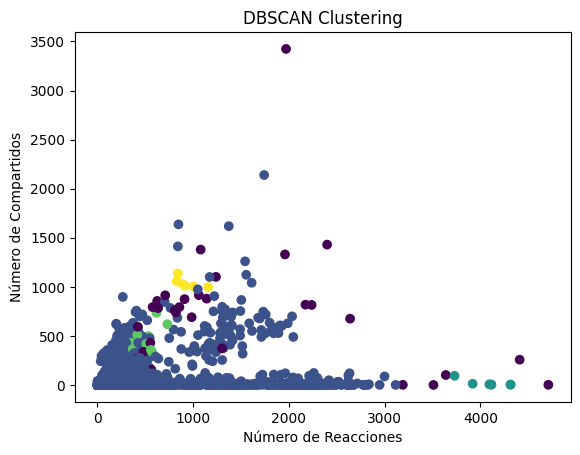

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

archivo_csv = 'live.csv'
data = pd.read_csv(archivo_csv)

columnas_seleccionadas = ['num_reactions', 'num_comments']
X = data[columnas_seleccionadas]

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

epsilon = 0.5  
min_samples = 5 
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

data['DBSCAN_Labels'] = labels

plt.scatter(data['num_reactions'], data['num_shares'], c=labels, cmap='viridis')
plt.xlabel('Número de Reacciones')
plt.ylabel('Número de Compartidos')
plt.title('DBSCAN Clustering')
plt.show()
